In [1]:
import pandas as pd 

In [2]:
import dask.dataframe as dd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

### Load Data

In [5]:
df = dd.read_csv(r"C:\Users\tause\Downloads\Diwali Sales Data.csv", encoding='latin1')

In [6]:
print(df.head())


   User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35   28               0   
1  1000732     Kartik  P00110942      F     26-35   35               1   
2  1001990      Bindu  P00118542      F     26-35   35               1   
3  1001425     Sudevi  P00237842      M      0-17   16               0   
4  1000588       Joni  P00057942      M     26-35   28               1   

            State      Zone       Occupation Product_Category  Orders  \
0     Maharashtra   Western       Healthcare             Auto       1   
1  Andhra Pradesh  Southern             Govt             Auto       3   
2   Uttar Pradesh   Central       Automobile             Auto       3   
3       Karnataka  Southern     Construction             Auto       2   
4         Gujarat   Western  Food Processing             Auto       2   

    Amount  Status  unnamed1  
0  23952.0     NaN       NaN  
1  23934.0     NaN       NaN  
2  23924.0     NaN     

In [7]:
df.shape

(<dask_expr.expr.Scalar: expr=ArrowStringConversion(frame=FromMapProjectable(2d4c3a8)).size() // 15, dtype=int64>,
 15)

In [8]:
df.info()

<class 'dask.dataframe.dask_expr.DataFrame'>
Columns: 15 entries, User_ID to unnamed1
dtypes: float64(3), int64(4), string(8)

### Data Cleaning

In [9]:
df = df.drop(['Status', 'unnamed1'], axis=1)

In [19]:
df.info()

<class 'dask.dataframe.dask_expr.DataFrame'>
Columns: 13 entries, User_ID to Amount
dtypes: float64(1), int64(4), string(8)

In [11]:
df = df.fillna('Unknown')

In [13]:
df['Amount'] = dd.to_numeric(df['Amount'], errors='coerce')


### EDA

In [14]:
# Sales Analysis: Total Sales by Gender
total_sales = df.groupby('Gender')['Amount'].sum().compute()
print(total_sales)

Gender
F    74335856.43
M    31913276.00
Name: Amount, dtype: float64


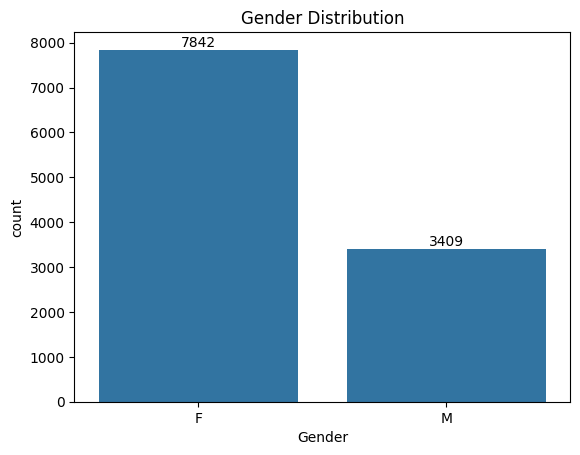

In [15]:
# Visualization 1: Countplot of Gender

df_pandas = df.compute()
ax = sns.countplot(x='Gender', data=df_pandas)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Gender Distribution')
plt.show()


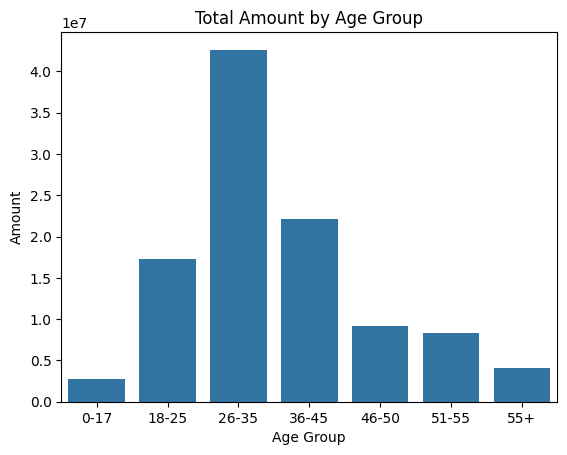

In [16]:
# Visualization 2: Age Group vs Total Amount
age_sales = df_pandas.groupby('Age Group')['Amount'].sum().reset_index()
sns.barplot(x='Age Group', y='Amount', data=age_sales)
plt.title('Total Amount by Age Group')
plt.show()

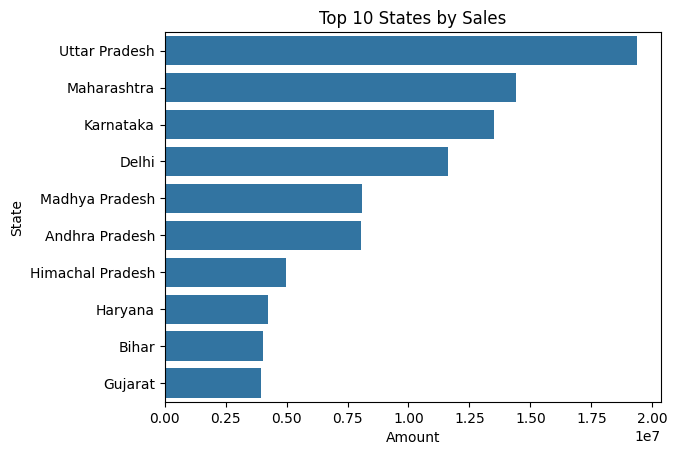

In [17]:
# Visualization 3: State-wise Sales
state_sales = df_pandas.groupby('State')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)
sns.barplot(x='Amount', y='State', data=state_sales.head(10))
plt.title('Top 10 States by Sales')
plt.show()


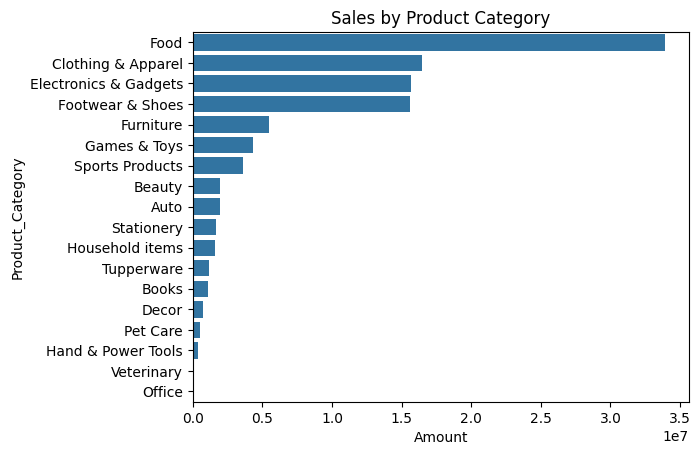

In [18]:
# Visualization 4: Product Category Analysis
category_sales = df_pandas.groupby('Product_Category')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)
sns.barplot(x='Amount', y='Product_Category', data=category_sales)
plt.title('Sales by Product Category')
plt.show()

In [53]:
### Distribution of Purchase Amount

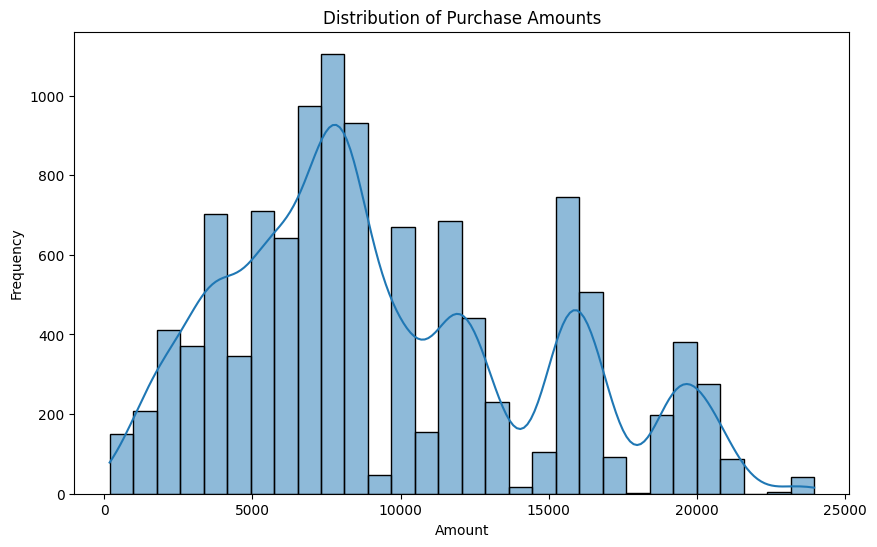

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=30, kde=True)
plt.title('Distribution of Purchase Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

In [54]:
### Insights

In [30]:
total_sales = df['Amount'].sum()
total_orders = df['Orders'].sum()
avg_order_value = total_sales / total_orders
print(f"Total Sales: {total_sales}")
print(f"Total Orders: {total_orders}")
print(f"Average Order Value: {avg_order_value}")

Total Sales: 106249132.43
Total Orders: 28007
Average Order Value: 3793.663456635841


### Conclusion

"Married women aged 26-35 years from Uttar Pradesh, Maharashtra, and Karnataka, working in the IT, Healthcare, and Aviation sectors, are the primary consumers, showing a strong preference for purchasing products in the Food, Clothing, and Electronics categories during Diwali."

In [22]:
# Export Results
df_pandas.to_csv(r"C:\Users\tause\Downloads\cleaned_diwali_sales.csv", index=False)
print("Data Cleaning and Analysis Completed using Dask.")


Data Cleaning and Analysis Completed using Dask.


### Thank you
